In [209]:
import pandas as pd
import numpy as np 
import seaborn as  sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [210]:
from sklearn.datasets import load_iris

In [211]:
data = load_iris()

In [212]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [213]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [214]:
df = pd.DataFrame(data.data, columns = data.feature_names)

In [215]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [216]:
df['target']=data.target

In [217]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [218]:
df['target_names'] = df['target'].map({i: name for i, name in enumerate(data.target_names)})

In [219]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


Binary Class Classification using decision tree

In [220]:
binary_df=df[df['target']!=2]

In [221]:
binary_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1,versicolor
96,5.7,2.9,4.2,1.3,1,versicolor
97,6.2,2.9,4.3,1.3,1,versicolor
98,5.1,2.5,3.0,1.1,1,versicolor


In [222]:
x_binary=binary_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]

In [223]:
y_binary=binary_df['target']

In [224]:
y_binary

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: target, Length: 100, dtype: int64

In [225]:
x_train_binary, x_test_binary,y_train_binary,y_test_binary = train_test_split(x_binary, y_binary, test_size=0.2)

In [226]:
scaler = StandardScaler()

In [227]:
x_train_binary_scaler = scaler.fit_transform(x_train_binary)

In [228]:
x_train_binary_scaler

array([[ 0.09964454, -1.47430142,  0.66201689,  0.57895116],
       [-1.61971226, -0.1564901 , -1.08013282, -1.02429821],
       [ 0.41225487, -0.37612532,  0.94076084,  0.9352288 ],
       [ 0.41225487, -0.59576054,  0.87107485,  0.9352288 ],
       [ 1.9753065 , -0.1564901 ,  1.49824875,  1.64778408],
       [ 0.7248652 , -0.1564901 ,  0.94076084,  1.29150644],
       [-1.46340709, -1.69393664, -1.08013282, -0.84615939],
       [-1.77601742, -0.1564901 , -1.21950479, -1.20243703],
       [-0.83818644, -1.47430142,  0.31358695,  0.40081234],
       [-0.9944916 ,  0.06314513, -0.87107485, -1.02429821],
       [-0.52557611,  1.60059167, -0.87107485, -1.02429821],
       [ 0.09964454,  0.94168601, -1.08013282, -1.02429821],
       [-0.83818644, -0.1564901 , -1.01044683, -1.02429821],
       [-0.52557611,  1.38095645, -0.94076084, -0.66802057],
       [-0.68188128,  0.72205079, -0.87107485, -0.66802057],
       [-0.52557611,  0.50241557, -0.80138886, -0.48988175],
       [ 0.56856003, -0.

In [229]:
x_test_binary_scaler = scaler.fit_transform(x_test_binary) 

In [230]:
x_test_binary_scaler

array([[ 0.30948566, -1.13293691,  0.74479887,  0.65602424],
       [-1.15649905, -0.2043001 , -0.95565517, -1.2943181 ],
       [-0.99361186,  0.53860935, -1.0916915 , -0.9397104 ],
       [ 0.79814723, -0.57575482,  1.22092601,  1.01063194],
       [ 1.93835756, -0.76148219,  1.28894417,  1.01063194],
       [ 0.63526004,  0.35288199,  1.08488968,  1.36523964],
       [-0.17917591, -1.690119  ,  0.74479887,  0.83332809],
       [-1.64516062,  0.72433672, -1.29574598, -1.11701425],
       [-0.66783748,  0.53860935, -0.95565517, -1.11701425],
       [-0.83072467,  1.09579144, -0.95565517, -0.9397104 ],
       [ 1.12392161, -1.690119  ,  1.01687152,  0.83332809],
       [ 1.61258318, -0.39002746,  1.01687152,  1.01063194],
       [-0.3420631 ,  1.2815188 , -0.81961885, -0.76240655],
       [-0.3420631 ,  0.35288199, -0.95565517, -0.76240655],
       [-1.48227343, -0.01857274, -1.0916915 , -1.11701425],
       [ 0.47237285, -0.01857274,  1.28894417,  1.71984734],
       [ 1.2868088 , -0.

In [231]:
decision_binary = DecisionTreeClassifier(criterion='gini',max_depth=5)

In [232]:
decision_binary.fit(x_train_binary,y_train_binary)

DecisionTreeClassifier(max_depth=5)

In [233]:
predicition = decision_binary.predict(x_test_binary)

In [234]:
predicition

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0])

In [235]:
confusion_matrix(y_test_binary,predicition)

array([[10,  0],
       [ 0, 10]])

In [236]:
print("Classification report on the decision tree of binary class:\n", classification_report(y_test_binary,predicition))

Classification report on the decision tree of binary class:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [237]:
accuracy_score(y_test_binary,predicition)

1.0

In [238]:
from sklearn.tree import plot_tree

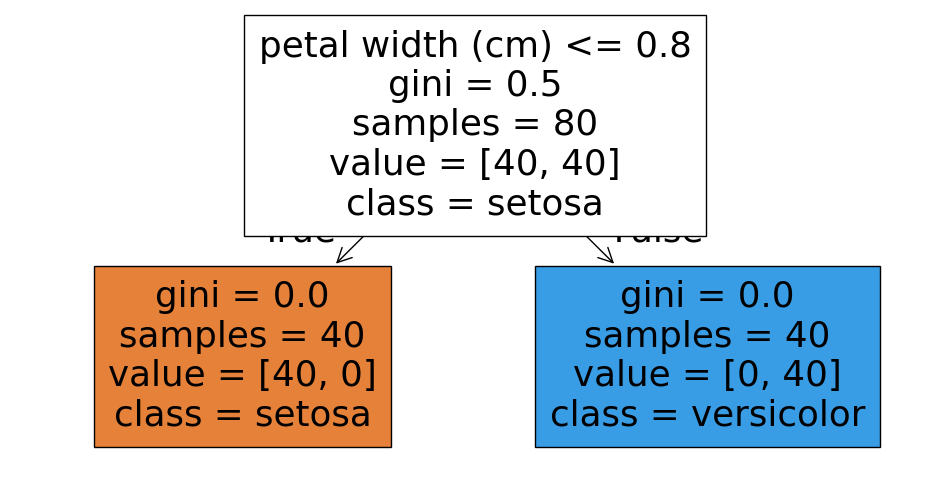

In [239]:
plt.figure(figsize=(12,6))
plot_tree(decision_binary, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.show()


In [240]:
joblib.dump(decision_binary,"Decision_Binary.pkl")

['Decision_Binary.pkl']

Multi Class Classification using Decision Tree

In [241]:
df['target_names'] = df['target'].map({i: name for i, name in enumerate(data.target_names)})

In [242]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [243]:
x_multi = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]

In [244]:
x_multi


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [245]:
y_multi = df["target"]

In [246]:
y_multi

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [247]:
x_train_multi, x_test_multi, y_train_multi, y_test_multi = train_test_split(x_multi, y_multi, test_size=0.2,random_state=42)

In [248]:
scaler = StandardScaler()


In [249]:
x_train_multi_scaled = scaler.fit_transform(x_train_multi)
x_test_multi_scaled = scaler.transform(x_test_multi)

In [250]:
decision_multi = DecisionTreeClassifier(criterion= 'gini',max_depth=3)

In [251]:
decision_multi.fit(x_train_multi_scaled,y_train_multi)

DecisionTreeClassifier(max_depth=3)

In [252]:
predcition = decision_multi.predict(x_test_multi_scaled)

In [253]:
predcition

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [255]:
confusion_matrix(y_test_multi, predcition)


array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [256]:
accuracy_score(y_test_multi, predcition)


1.0

In [262]:
joblib.dump(decision_multi, "Decision_Multi.pkl")

['Decision_Multi.pkl']

In [257]:
from sklearn.tree import plot_tree

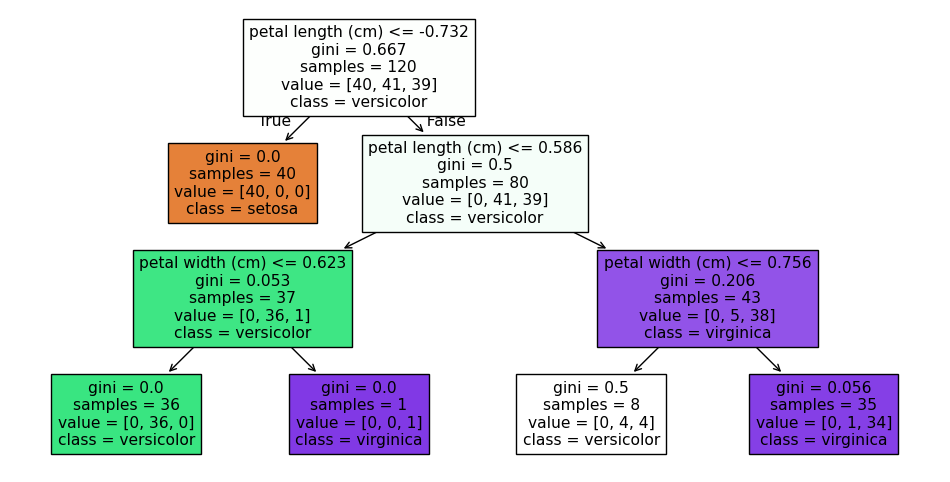

In [260]:
plt.figure(figsize=(12,6))
plot_tree(decision_multi,feature_names=data.feature_names, class_names=data.target_names,filled=True)
plt.show()